In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:95% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font color="red" size="5">ch.10 N차원 배열 다루기</font></b>
# 4절. 복사와 뷰
## 4.1 할당

In [2]:
import numpy as np
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [4]:
#b에 a를 할당
b = a

In [6]:
# a와 b가 같은 객체인지를 물어봄
a is b

True

In [10]:
b.shape = (2, 3)
b

array([[0, 1, 2],
       [3, 4, 5]])

In [12]:
#b의 형태가 변경되자 a(원본)도 바뀜
a

array([[0, 1, 2],
       [3, 4, 5]])

## 4.2 뷰(view)
- 슬라이싱을 할 경우 자동 view가 생성됨.

In [13]:
c = np.arange(12).reshape(2, -1)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [16]:
d = c.view() #c의 view를 생성(얇은 복사)
d is c # d와 c의 객체가 다름

False

In [17]:
id(c), id(d)

(1461741201392, 1461741199760)

In [20]:
np.all(c == d) #주소는 다르나, 내부 데이터 자체는 같음.

True

In [23]:
d.shape = (3,4)
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [24]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [25]:
d[0, ::2] = -99
d

array([[-99,   1, -99,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

In [26]:
c

array([[-99,   1, -99,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11]])

In [28]:
# 슬라이싱이 될 때 자동 뷰가 반환됨.
c = np.arange(12).reshape(2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [29]:
d = c[:, :-1]
d

array([[ 0,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 10]])

In [31]:
d[..., -1] = 99
d

array([[ 0,  1,  2,  3, 99],
       [ 6,  7,  8,  9, 99]])

In [32]:
c

array([[ 0,  1,  2,  3, 99,  5],
       [ 6,  7,  8,  9, 99, 11]])

## 4.3 깊은복사

In [38]:
c = np.arange(12).reshape(2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [39]:
d = c[:, :-1].copy() # 깊은 복사
d[..., -1] = 99
d

array([[ 0,  1,  2,  3, 99],
       [ 6,  7,  8,  9, 99]])

In [40]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

# 5절. 고급인덱싱
## 5.1 인덱스 배열로 인덱싱

In [41]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [42]:
a[ [0,0,1,5] ]

array([ 0,  0,  1, 25])

In [43]:
# 인덱싱하기 위한 값을 배열로 만듦
i = np.array([0,0,1,5])
a[i]

array([ 0,  0,  1, 25])

In [44]:
# 이미지 딥러닝에 자주 사용됨, 인덱싱하기 위한 값을 배열로 만듦
j = np.array([[0, 0],
             [1, 5]])
a[j]

array([[ 0,  0],
       [ 1, 25]])

In [45]:
#image_data = [[[255,255,255],
#               [255,255,255]
#               [255,255,255]
#               [0,0,0],
#              ],
#             ]

In [47]:
                    #R G B
palette = np.array([[0,0,0], #black
                    [255,0,0], #red
                    [0,255,0], #green
                    [0,0,255], #blue
                    [255,255,255]]) #white

In [51]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_data = palette[image_index]

In [53]:
image_data.shape

(10, 10, 3)

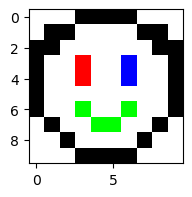

In [54]:
from matplotlib import pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(image_data)
plt.show()

## 5.2 논리 배열을 이용한 인덱싱

In [57]:
a = np.array([0,1,10,11,12,13,14,15,99])
a

array([ 0,  1, 10, 11, 12, 13, 14, 15, 99])

In [58]:
a%2==0

array([ True, False,  True, False,  True, False,  True, False, False])

In [60]:
a[a%2==0] #논리 배열을 이용한 인덱싱 시 True요소만 추출

array([ 0, 10, 12, 14])

In [61]:
# a에서 12보다 큰 값만 추출
a[a>12]

array([13, 14, 15, 99])

# 6절. 선형대수
- 벡터와 행렬을 다루는 수학 분야,넘파이에서는 2차원 배열(ndarray)을 행렬로 보고,다양한 연산을 지원합니다.
- 2차원 numpy배열을 행렬
    * 행렬 곱 : np.dot(A, B) 또는 A @ B, 수학적 의미의 행렬 곱
    * 역행렬 : np.linalg.inv(A), 역행렬과 행렬을 곱했을 때 단위행렬이 되는 것
    * 전치 행렬 : 행렬.T / 행렬.transpose() 행과 열을 뒤집은 행렬

    * 단위 행렬 : np.eye(n), 대각선이 1이고 나머지는 0인 n×n 행렬
    * 행렬식 : np.linalg.det(A), 행렬의 특성을 나타내는 수
    * 연립방정식 : np.linalg.solve(A, b), Ax = b 형태의 해를 구함

In [62]:
a = np.array([[1,2],
              [3,4]])
a #정방행렬

array([[1, 2],
       [3, 4]])

In [63]:
# a의 역행렬 : a의 역행렬 @ a = a@a의 역행렬 => 단위행렬
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [64]:
np.linalg.inv(a) @ a

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

## 6.1 선형 연립방정식 풀기(독립변수1, 데이터2)

In [3]:
import numpy as np
x = np.array([2, 4]) #독립변수
Y = np.array([40,60]) #종속변수
X = np.dstack( (x, np.ones(len(x))))
X, X.shape

(array([[[2., 1.],
         [4., 1.]]]),
 (1, 2, 2))

In [5]:
Y.reshape(-1, 1) # 출력결과가 나오면 Y는 그대로, return 값만 출력

array([[40],
       [60]])

In [6]:
# X @ wb = Y
# X의 역행렬 @ X @ wb = X의 역행렬 @ Y
# wb = X의 역행렬 @ Y
wb = np.linalg.inv(X) @ Y
wb

array([[10., 20.]])

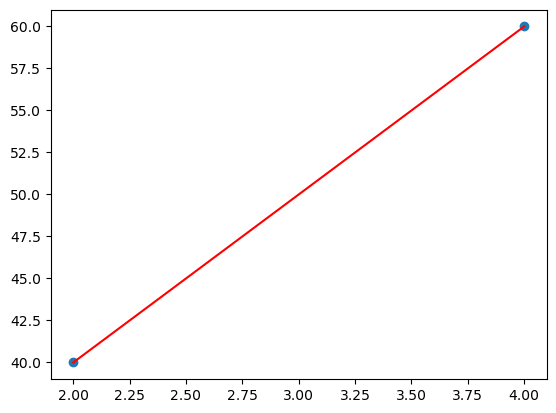

In [8]:
import matplotlib.pyplot as plt # matplotlib 라이브러리의 pyplot 모듈을 plt라는 이름으로 불러옵니다 (그래프 그리기용)
plt.scatter(x, Y) #주어진 x, y 좌표에 점을 찍습니다.
plt.plot(x, 10*x+20, 'r') #x축과 y=10x+20을 연결해서 빨간 선을 그립니다.
plt.show()     # 명령어는 출력하지 않고, 그래프만 출력하는 함수

In [11]:
np.linalg.solve(X, Y) # w(기울기), b(Y절편)을 구하는 함수

ValueError: solve: Input operand 1 does not have enough dimensions (has 1, gufunc core with signature (m,m),(m,n)->(m,n) requires 2)

## 6.2 선형연립방정식 풀기(회귀분석) : 독립변수 1개, 데이터 n개
- 선형 연립방정식 : 여러 개의 1차 방정식을 동시에 푸는 것
- 회귀분석 : 하나 이상의 독립변수(x) 를 사용해서 종속변수(y) 가 어떻게 변하는지를 모델링하는 통계적 기법
- 정방행렬 : 행(Row)과 열(Column)의 수가 같은 행렬

In [14]:
x = np.array([32,64,96,118])
X = np.c_[x, np.ones(len(x))]
X # 정방행렬이 아님

array([[ 32.,   1.],
       [ 64.,   1.],
       [ 96.,   1.],
       [118.,   1.]])

In [16]:
# np.linalg.inv(X) X가 정방행렬이 아니면 역행렬을 구할 수 없음.

In [17]:
# X의 역행렬 @ x @ wb = X의 역행렬 @ Y

In [19]:
X.T, X.transpose() # 전치행렬

(array([[ 32.,  64.,  96., 118.],
        [  1.,   1.,   1.,   1.]]),
 array([[ 32.,  64.,  96., 118.],
        [  1.,   1.,   1.,   1.]]))

In [21]:
X.T, X.transpose() # 전치행렬

(array([[ 32.,  64.,  96., 118.],
        [  1.,   1.,   1.,   1.]]),
 array([[ 32.,  64.,  96., 118.],
        [  1.,   1.,   1.,   1.]]))

In [20]:
X_ = X.T @ X
X_

array([[2.826e+04, 3.100e+02],
       [3.100e+02, 4.000e+00]])

In [22]:
# x가 정방행열이 아닌경우, X.T @X로 정방행렬을 만든 후 역행렬을 곱
np.linalg.inv(X_) @ X_

array([[1., 0.],
       [0., 1.]])

In [26]:
x = np.array([32, 64, 96, 118, 126, 144, 152.5, 158])
y = np.array([18, 24, 61.5, 49, 52, 105, 130.3, 125])
X = np.c_[x, np.ones(len(x))] # np.c_[x, np.ones(x.shape[0])]
Y = y.reshape(-1, 1)
X, Y

(array([[ 32. ,   1. ],
        [ 64. ,   1. ],
        [ 96. ,   1. ],
        [118. ,   1. ],
        [126. ,   1. ],
        [144. ,   1. ],
        [152.5,   1. ],
        [158. ,   1. ]]),
 array([[ 18. ],
        [ 24. ],
        [ 61.5],
        [ 49. ],
        [ 52. ],
        [105. ],
        [130.3],
        [125. ]]))

In [27]:
#             X @ wb = Y
#      X_(X.T @ X @ wb = X.T @ Y
#(X.T @ X)의 역행렬 @ X.T @ X @ wb = (X.T @ X)의 역행렬 @ X.T @ Y
    # X_의 역행렬 @ X_ @ wb = X_ 의 역행렬 @ X.T @ Y
wb = np.linalg.inv(X.T @ X) @ X.T @ Y
wb

array([[  0.87493126],
       [-26.79078617]])

In [31]:
print(wb[0, 0], wb[1,0]) # 기울기와 Y절편
y_hat = wb[0,0] * x + wb[1,0] #실제값은 통상 y라고 표현하고 추측값은 y_hat으로 함(실무에서)
print('독립변수 :', x)
print('종속변수 :', y)
print('예측값 :', y_hat)

0.8749312625981291 -26.79078616795418
독립변수 : [ 32.   64.   96.  118.  126.  144.  152.5 158. ]
종속변수 : [ 18.   24.   61.5  49.   52.  105.  130.3 125. ]
예측값 : [  1.20701424  29.20481464  57.20261504  76.45110282  83.45055292
  99.19931565 106.63623138 111.44835332]


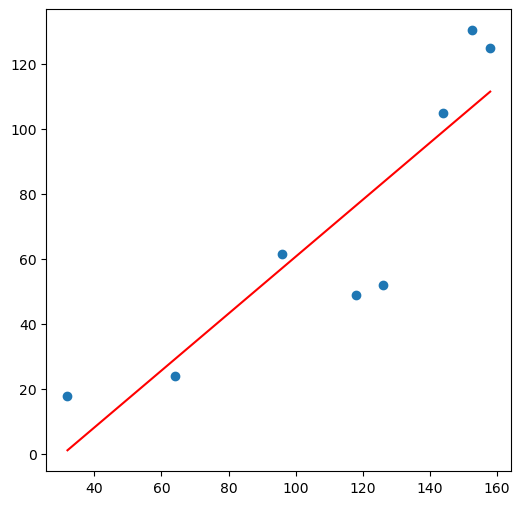

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.scatter(x, y)
plt.plot(x, y_hat, 'r')
_ = plt.show

# 7절. 연습문제
## 실습형

In [41]:
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data

In [45]:
type(iris_data), iris_data.dtype, iris_data.shape # 150행 4열짜리 float 배열

(numpy.ndarray, dtype('float64'), (150, 4))

In [47]:
# 1. 열별 평균
means = np.mean(iris_data, axis=0)   # 열(column)별 평균을 계산
print(means)

[5.84333333 3.05733333 3.758      1.19933333]


In [48]:
# 2. 처음 다섯개 행 출력
print(iris_data[:5])
# 다음과 같이 해도 동일한 값을 얻을 수 있음
#  #iris_data[:5,], iris_data[:5,:] iris_data[:5,...]

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [49]:
# 3. 처음 다섯개 행에서 마지막 열을 제외한 나머지 열을 출력하세요
print(iris_data[:5, :-1])

[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]]


In [94]:
# 강사님 답안 실습형3. 처음 다섯개 행에서 마지막 열을 제외한 나머지 열을 출력
ex3 = iris_data[:5, :-1]
ex3

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [52]:
# 4. 처음 다섯개 행에서 마지막 열만 출력하세요
print(iris_data[:5, -1])

[0.2 0.2 0.2 0.2 0.2]


In [95]:
# 강사님 답안 실습형 4. 처음 다섯개 행에서 마지막 열만 출력
ex4 = iris_data[:5,-1] #iris_data[:5,-1:]라고 하면 5행1열로 됨
ex4

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [90]:
# 5. 3번 배열과 4번 배열을 원래 모양으로 합하기
x1 = iris_data[:5, :-1]
x2 = iris_data[:5, -1].reshape(-1, 1)
result = np.concatenate([x1, x2], axis=1)
print(result)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [98]:
# 강사님 답안.
answer1 = np.c_[ex3,ex4]
answer2 = np.column_stack((ex3, ex4))
answer3 = np.hstack((ex3, ex4[:, np.newaxis]))
answer4 = np.hstack( (ex3, ex4.reshape(-1,1)))
answer5 = np.concatenate( (ex3, ex4.reshape(-1, 1)), axis=1)
print(answer1)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [99]:
# 6. 처음 다섯 개 행을 이용해서 각 열 별로 평균보다 큰 값들만 출력하세요
data = iris_data[:5]
col_means = np.mean(data, axis=0)
result = data[data > col_means]
print(result)

#sample = iris_data[:5]
#sample[sample > np.mean(sample, axis=0)]
#print(sample)
#print('열별 평균 : ', np.mean(sample, axis=0))

[5.1 3.5 4.9 1.5 5.  3.6]


## 문제풀이형

In [58]:
# 1. 다음 보기의 데이터가 있을 경우 print(a.sum(0))의 결과는? 3번
import numpy as np
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [57]:
print(a.sum(0))

[12 15 18 21]


In [61]:
# 2. a 데이터가 다음과 같을 때 다음 중 차원을 바꿀 수 있는 방법을 모두 고르세요. 1번 -> 3번
#       나머지는 차원이 바뀐 값을 return하여 출력될 뿐 a가 바뀌지 않는다
import numpy as np
a = np.floor(10*np.random.random((3,4)))
a

array([[4., 4., 6., 2.],
       [4., 8., 9., 7.],
       [8., 0., 0., 7.]])

In [65]:
a.shape

(3, 4)

In [67]:
a.ravel()

array([4., 4., 6., 2., 4., 8., 9., 7., 8., 0., 0., 7.])

In [69]:
a.reshape(6,2)

array([[4., 4.],
       [6., 2.],
       [4., 8.],
       [9., 7.],
       [8., 0.],
       [0., 7.]])

In [76]:
a.resize((2,6))
print(a)

[[4. 4. 6. 2. 4. 8.]
 [9. 7. 8. 0. 0. 7.]]


In [77]:
a.T

array([[4., 9.],
       [4., 7.],
       [6., 8.],
       [2., 0.],
       [4., 0.],
       [8., 7.]])

In [ ]:
# 3. 다음 데이터에서 첫번째 행과 두번째 행만 뽑아내고 싶습니다. 빈칸에 들어갈 내용으로 옳은 것을 고르세요. 1번

In [79]:
import numpy as np
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [80]:
a[:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [81]:
a[:,:2]

array([[0, 1],
       [4, 5],
       [8, 9]])

In [82]:
a[1,2]

6

In [83]:
a[1][2]

6

In [ ]:
# 4. 다음 코드의 실행 결과는 ? 2번

In [84]:
import numpy as np
a=np.array([1,2,3,4,5])
a[[1,3,4]]=0
a

array([1, 0, 3, 0, 0])

In [ ]:
# 5. 다음 두 배열 a, b를 출력의 예시처럼 만들고 싶을 때 빈 칸에 입력해야 할 내용으로 바른 것은? 2번

In [85]:
import numpy as np
a = np.array([1,2,3,4,5])
b = np.array([6,7,8,9,10])

In [86]:
np.r_[a,b]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [87]:
np.c_[a,b]

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [88]:
np.ix_(a,b)

(array([[1],
        [2],
        [3],
        [4],
        [5]]),
 array([[ 6,  7,  8,  9, 10]]))

In [89]:
[[a],[b]]

[[array([1, 2, 3, 4, 5])], [array([ 6,  7,  8,  9, 10])]]